First 5 rows of data:
                    Timestamp  Accel_X  Accel_Y  Accel_Z  Vibration  Label
0  2024-09-19 17:24:56.914045    -0.61     0.91     0.01      14.11      1
1  2024-09-19 17:24:56.914045    -2.88    -2.52     2.41      16.52      1
2  2024-09-19 17:24:56.914045    -0.30    -0.14    -0.18       7.27      0
3  2024-09-19 17:24:56.914045    -2.29     2.24    -0.36       8.51      1
4  2024-09-19 17:24:56.914045    -0.27     0.97    -2.24      16.77      1

Descriptive Statistics:
             Accel_X        Accel_Y        Accel_Z      Vibration  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.000021       0.003127       0.006119       9.989874   
std         1.730929       1.730670       1.735568       5.775188   
min        -3.000000      -3.000000      -3.000000       0.000000   
25%        -1.490000      -1.490000      -1.490000       4.980000   
50%        -0.000000       0.020000       0.000000       9.990000   
75%         1.500000

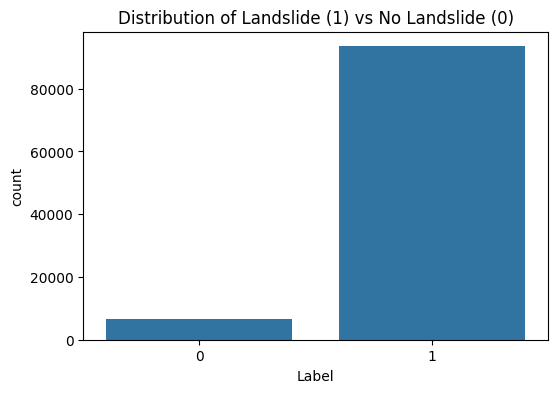


Correlation Matrix (Numeric Columns Only):
            Accel_X   Accel_Y   Accel_Z  Vibration     Label
Accel_X    1.000000 -0.004097  0.003870  -0.004515 -0.001321
Accel_Y   -0.004097  1.000000  0.001931  -0.001961 -0.000433
Accel_Z    0.003870  0.001931  1.000000   0.001494  0.000359
Vibration -0.004515 -0.001961  0.001494   1.000000  0.230227
Label     -0.001321 -0.000433  0.000359   0.230227  1.000000


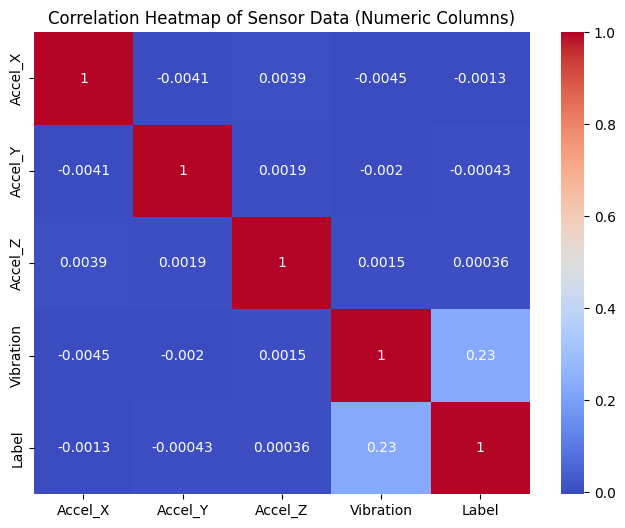

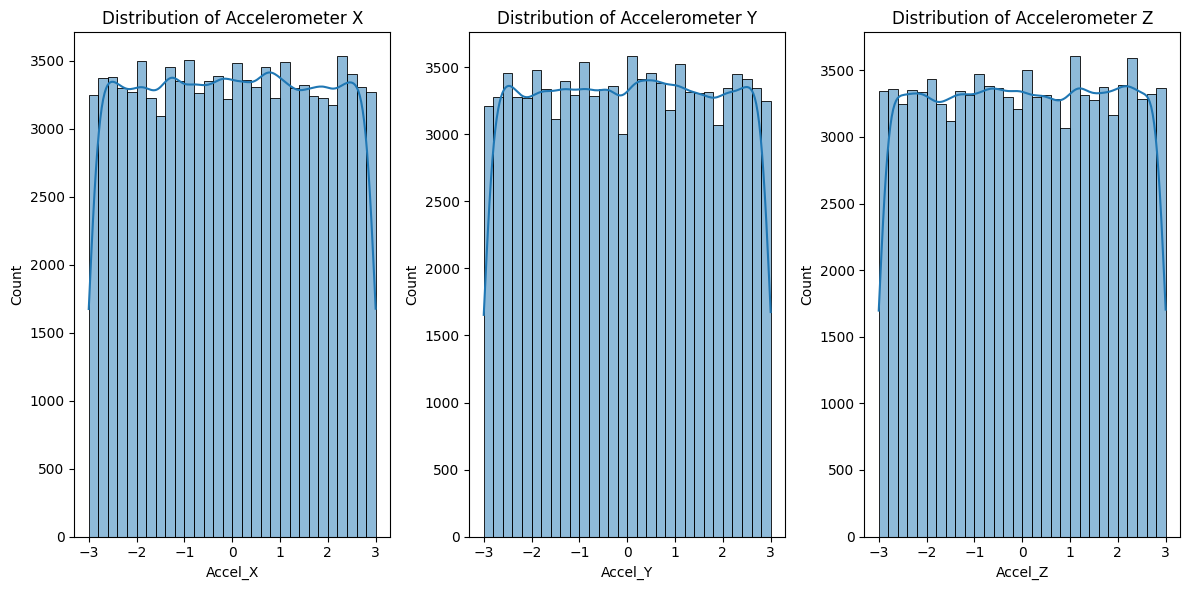

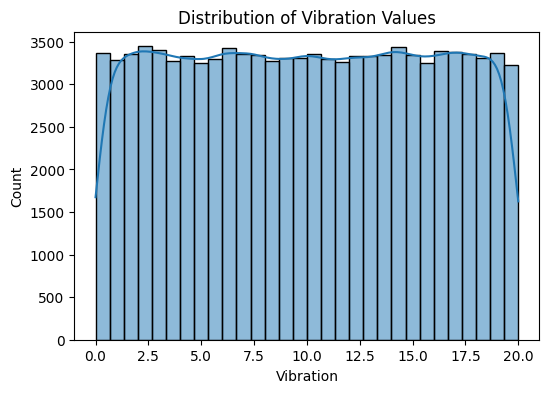

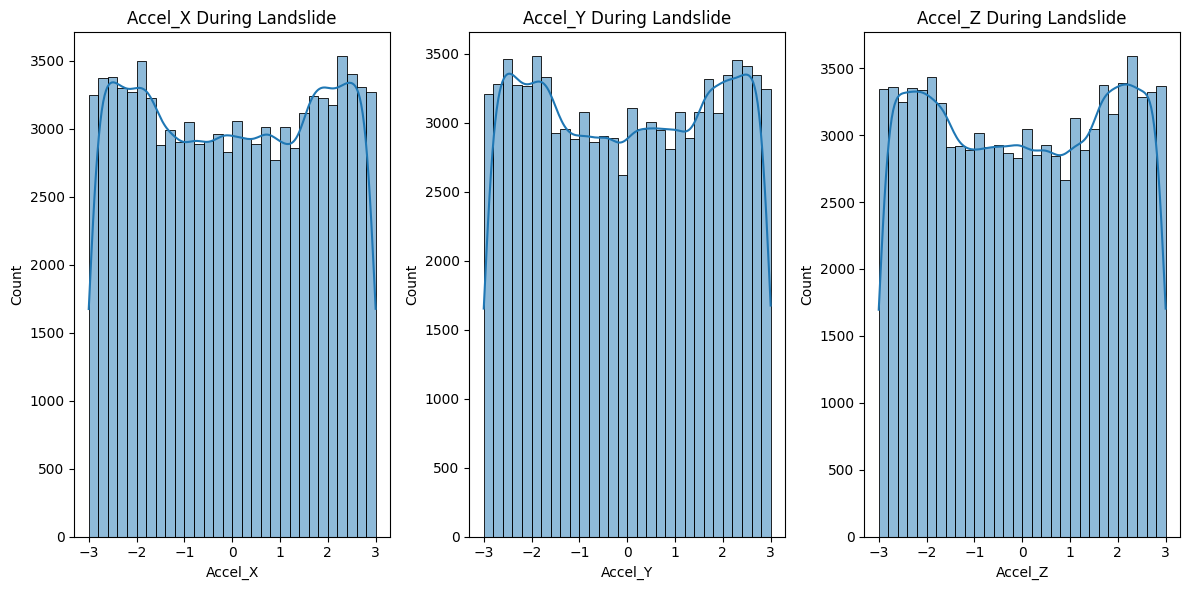

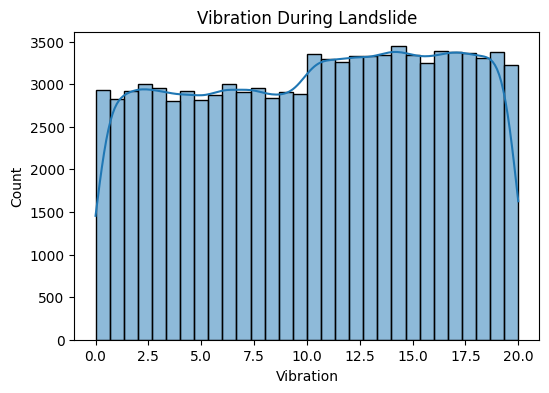

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('landslide_sensordata.csv')

# Display the first 5 rows of the dataset
print("First 5 rows of data:")
print(df.head())

# Step 3: Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Step 4: Count of Landslide vs No Landslide
print("\nLandslide occurrences (Label 1 indicates landslide, 0 indicates no landslide):")
print(df['Label'].value_counts())

# Plot the distribution of landslides and no landslides
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Label')
plt.title('Distribution of Landslide (1) vs No Landslide (0)')
plt.show()

# Step 5: Correlation Analysis
print("\nCorrelation Matrix (Numeric Columns Only):")
numeric_columns = df.select_dtypes(include=[float, int])  # Select only numeric columns
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Sensor Data (Numeric Columns)')
plt.show()

# Step 6: Distribution of Accelerometer and Vibration Values
# Plot the distribution of accelerometer values
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Accel_X'], bins=30, kde=True)
plt.title('Distribution of Accelerometer X')

plt.subplot(1, 3, 2)
sns.histplot(df['Accel_Y'], bins=30, kde=True)
plt.title('Distribution of Accelerometer Y')

plt.subplot(1, 3, 3)
sns.histplot(df['Accel_Z'], bins=30, kde=True)
plt.title('Distribution of Accelerometer Z')

plt.tight_layout()
plt.show()

# Plot the distribution of vibration values
plt.figure(figsize=(6, 4))
sns.histplot(df['Vibration'], bins=30, kde=True)
plt.title('Distribution of Vibration Values')
plt.show()

# Step 7: Analyzing Sensor Data for Landslide (Label = 1)
landslide_data = df[df['Label'] == 1]

# Plot the distribution of accelerometer values during landslide events
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(landslide_data['Accel_X'], bins=30, kde=True)
plt.title('Accel_X During Landslide')

plt.subplot(1, 3, 2)
sns.histplot(landslide_data['Accel_Y'], bins=30, kde=True)
plt.title('Accel_Y During Landslide')

plt.subplot(1, 3, 3)
sns.histplot(landslide_data['Accel_Z'], bins=30, kde=True)
plt.title('Accel_Z During Landslide')

plt.tight_layout()
plt.show()

# Plot the distribution of vibration values during landslide events
plt.figure(figsize=(6, 4))
sns.histplot(landslide_data['Vibration'], bins=30, kde=True)
plt.title('Vibration During Landslide')
plt.show()


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features (sensor data) and target (label)
X = df[['Accel_X', 'Accel_Y', 'Accel_Z', 'Vibration']]
y = df['Label']


In [5]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to standardize the data (important for some ML algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1316
           1       1.00      1.00      1.00     18684

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


Confusion Matrix:
[[ 1316     0]
 [    0 18684]]


In [8]:
from xgboost import XGBClassifier

# Initialize and train XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')

# Classification report
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 99.92%

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1316
           1       1.00      1.00      1.00     18684

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [9]:
# Save the trained model
import pickle

# Save the Random Forest model to a file
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Save the scaler used for feature scaling
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
